## Data analysis part-2

In [376]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt

In [377]:
# Load the dataset
dataset_sa2 = pd.read_csv("/content/drive/MyDrive/data/final_data_sa2.csv")

In [378]:
# Display the first few rows of the dataset
dataset_sa2.head() # Import the final dataset

,Unnamed: 0,SA2_CODE21,SA2_NAME21,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume,geometry_x
0,0,201011001,Alfredton,381.9,20126.13,1011.0,3.0,13,9692.036076,POLYGON ((143.78282104711133 -37.5666578080732...
1,1,201011002,Ballarat,951.1,11793.64,1040.0,5.0,34,8222.227273,POLYGON ((143.81896375194268 -37.5558184903035...
2,2,201011005,Buninyong,951.1,49076.76,1040.0,3.0,11,4408.875000,POLYGON ((143.8417079819547 -37.61596158212406...
3,3,201011006,Delacombe,417.8,14288.76,947.0,0.0,8,4324.000000,POLYGON ((143.7505006002539 -37.59119089617515...
4,4,201011007,Smythes Creek,40.8,4271.76,1005.0,0.0,1,9692.036076,POLYGON ((143.7329551500814 -37.62333175526272...


In [379]:
dataset_sa2.shape # Check the shape of the dataset

(522, 10)

In [380]:
dataset_sa2 = dataset_sa2.drop(columns=['Unnamed: 0'])

In [381]:
#Check the nan values in the dataset
dataset_sa2.isna().sum()

,0
SA2_CODE21,0
SA2_NAME21,0
Population density 2024(persons/km2),0
Total Population,0
IRSAD Score,0
ChargerCount,0
AmenitiesCount,0
Average Annual Daily Traffic Volume,0
geometry_x,0


In [382]:
#Explore the columns
dataset_sa2.columns

Index(['SA2_CODE21', 'SA2_NAME21', 'Population density 2024(persons/km2)',
       'Total Population', 'IRSAD Score', 'ChargerCount', 'AmenitiesCount',
       'Average Annual Daily Traffic Volume', 'geometry_x'],
      dtype='object')

In [383]:
dataset_sa2_copy = dataset_sa2[[#'SA2_CODE21', 'SA2_NAME21',
                                'Population density 2024(persons/km2)',
       'Total Population', 'IRSAD Score', 'ChargerCount', 'AmenitiesCount',
       'Average Annual Daily Traffic Volume'
                                #'geometry_x'
                                ]].copy()

In [384]:
dataset_sa2_copy.head()

,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume
0,381.9,20126.13,1011.0,3.0,13,9692.036076
1,951.1,11793.64,1040.0,5.0,34,8222.227273
2,951.1,49076.76,1040.0,3.0,11,4408.875000
3,417.8,14288.76,947.0,0.0,8,4324.000000
4,40.8,4271.76,1005.0,0.0,1,9692.036076


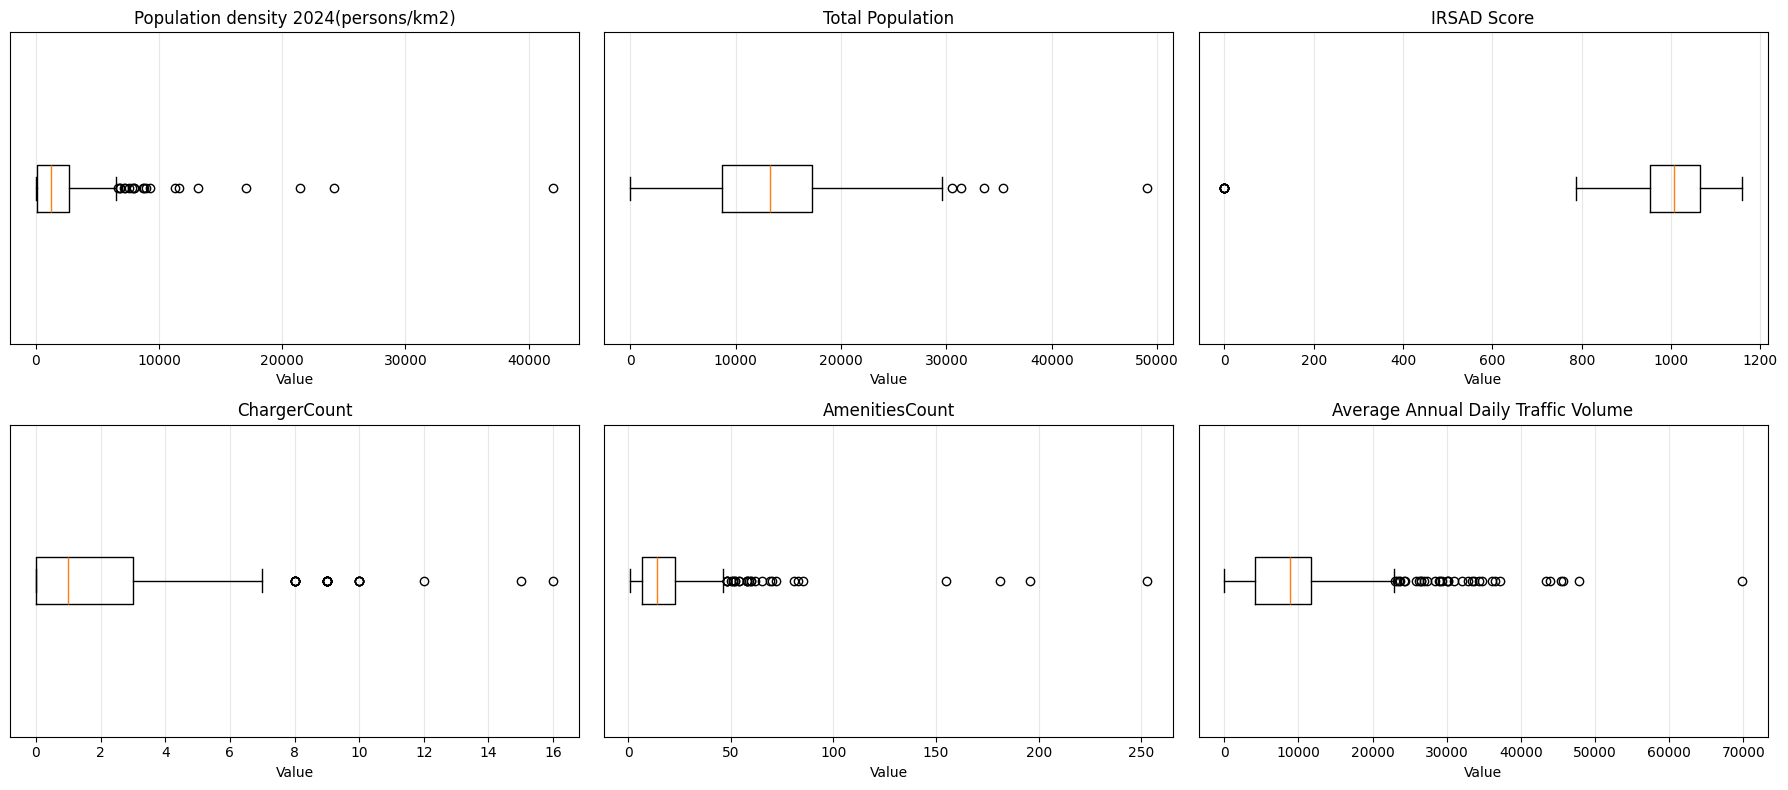

In [385]:
import matplotlib.pyplot as plt

features = [
    'Population density 2024(persons/km2)',
    'Total Population',
    'IRSAD Score',
    'ChargerCount',
    'AmenitiesCount',
    'Average Annual Daily Traffic Volume'
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.ravel()  # flatten to 1D for easy indexing

for i, feat in enumerate(features):
    ax = axes[i]
   # data = dataset_sa2[feat].dropna()          # drop NaNs so boxplot doesn't error
    ax.boxplot(dataset_sa2_copy[feat], vert=False, patch_artist=False)
    ax.set_title(feat)
    ax.set_xlabel("Value")
    ax.set_yticks([])                          # single box -> no categorical y-ticks
    ax.grid(axis='x', alpha=0.3)

# If you had more axes than features, hide the extras (here it's equal, but safe to keep)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [386]:
dataset_sa2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Population density 2024(persons/km2)  522 non-null    float64
 1   Total Population                      522 non-null    float64
 2   IRSAD Score                           522 non-null    float64
 3   ChargerCount                          522 non-null    float64
 4   AmenitiesCount                        522 non-null    int64  
 5   Average Annual Daily Traffic Volume   522 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 24.6 KB


In [387]:
dataset_sa2_copy.describe()

,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,1893.119157,13448.911533,991.524904,2.153257,18.599617,9692.036076
std,2997.305667,6624.649123,150.061895,2.674160,21.560134,8160.973343
min,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
25%,101.750000,8704.570000,952.000000,0.000000,7.000000,4182.111779
50%,1233.750000,13243.620000,1006.000000,1.000000,14.000000,8862.395833
75%,2682.575000,17235.540000,1065.750000,3.000000,23.000000,11654.517500
max,41985.400000,49076.760000,1158.000000,16.000000,253.000000,69758.000000


In [388]:
dataset_sa2_copy.shape

(522, 6)

## Feature scaling

In [389]:
from sklearn.preprocessing import StandardScaler

features = ['Population density 2024(persons/km2)',
            'Total Population',
            'IRSAD Score',
            'ChargerCount',
            'AmenitiesCount',
            'Average Annual Daily Traffic Volume'
            ]

scaler = StandardScaler()
dataset_sa2_scaled = scaler.fit_transform(dataset_sa2_copy[features])

# Convert the scaled array back to a DataFrame
dataset_sa2_scaled = pd.DataFrame(dataset_sa2_scaled, columns=features)

# Display the head of the new DataFrame
dataset_sa2_scaled.head()

,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume
0,-0.504676,1.008902,0.129905,0.316943,-0.259970,2.231026e-16
1,-0.314590,-0.250105,0.323344,1.065559,0.714984,-1.802749e-01
2,-0.314590,5.383232,0.323344,0.316943,-0.352823,-6.479900e-01
3,-0.492687,0.126898,-0.296995,-0.805981,-0.492102,-6.584001e-01
4,-0.618588,-1.386633,0.089883,-0.805981,-0.817087,2.231026e-16


## Use elbow method to find optimal number of clusters

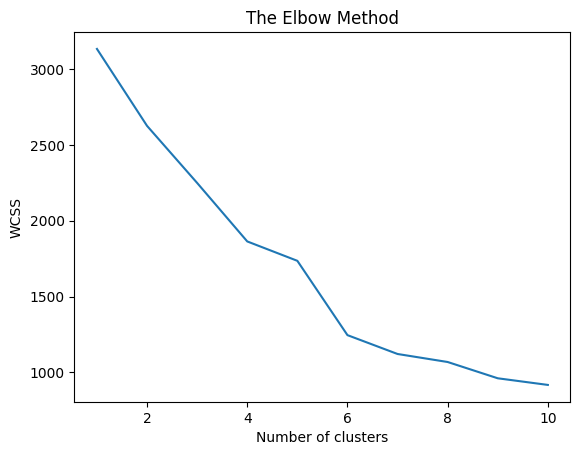

In [390]:
#Selecting the optimum k value using Lbow method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init= 'auto')
    kmeans.fit(dataset_sa2_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [391]:
dataset_sa2_scaled = X

In [392]:
"""# Selecting the optimum k value using Silhouette Coefficient
sil_scores = []
for num in range(2,10): # There needs to be at least two cluters to calculate the silhouette Score
  kmeans = KMeans(n_clusters=num, init='k-means++', random_state=42, n_init='auto')
  kmeans.fit(dataset_sa2_scaled)
  sil_scores.append(silhouette_score(dataset_sa2_scaled, kmeans.labels_))
print(sil_scores)

plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()"""

"# Selecting the optimum k value using Silhouette Coefficient\nsil_scores = []\nfor num in range(2,10): # There needs to be at least two cluters to calculate the silhouette Score\n  kmeans = KMeans(n_clusters=num, init='k-means++', random_state=42, n_init='auto')\n  kmeans.fit(dataset_sa2_scaled)\n  sil_scores.append(silhouette_score(dataset_sa2_scaled, kmeans.labels_))\nprint(sil_scores)\n\nplt.plot(range(2, 10), sil_scores, marker='o')\nplt.xlabel('Number of Clusters')\nplt.ylabel('Silhouette Score')\nplt.title('Silhouette Score vs. Number of Clusters')\nplt.show()"

In [393]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset_sa2_scaled)
print(y_kmeans)
labels = kmeans.labels_

# check how many of the samples were correctly labeled


[0 5 0 5 2 5 2 5 5 5 2 2 2 2 2 2 2 2 2 5 5 5 2 0 2 1 5 2 2 2 2 2 2 2 2 2 2
 2 1 5 0 0 0 5 5 1 5 5 5 0 2 5 2 2 2 0 5 5 2 2 5 2 2 2 2 2 2 2 2 2 5 2 2 2
 2 2 2 5 2 5 1 0 2 2 0 2 5 2 2 2 2 2 2 2 2 2 5 2 0 2 5 5 2 1 5 2 2 5 2 5 2
 5 5 3 5 5 1 5 1 0 5 1 5 1 5 1 1 0 5 1 2 1 1 1 3 1 0 0 0 1 3 0 1 1 1 5 5 3
 5 1 5 1 0 1 1 1 1 2 1 1 1 1 0 5 1 5 0 0 5 5 1 5 1 1 5 1 1 0 5 5 5 5 0 1 0
 3 5 1 1 5 0 3 5 5 5 0 0 0 5 1 3 2 5 1 1 1 1 1 5 1 0 5 1 1 2 0 3 0 1 0 5 5
 5 1 5 5 1 1 0 1 5 1 5 5 0 2 2 2 1 2 5 1 3 5 1 3 0 5 5 1 5 5 5 0 5 1 1 1 1
 5 3 3 3 2 3 1 5 5 2 2 2 1 3 2 1 5 1 1 5 5 2 5 5 1 3 4 0 5 2 3 2 1 0 0 1 5
 1 5 1 3 2 5 1 1 3 3 0 1 1 2 5 2 1 5 0 0 1 5 5 2 3 1 3 1 1 2 2 5 1 5 2 1 0
 2 1 1 2 5 5 0 2 5 5 2 2 0 0 3 3 2 5 3 5 1 0 3 0 0 0 0 2 5 5 1 0 0 5 5 5 1
 4 5 5 3 1 1 0 1 1 5 0 1 1 1 3 0 4 5 4 3 0 3 1 3 4 1 1 1 5 5 5 1 3 3 1 1 1
 3 1 4 3 0 1 5 0 0 5 1 5 5 0 0 0 0 1 1 0 1 1 2 5 5 2 1 5 1 5 3 5 0 5 5 0 5
 5 4 5 0 5 1 5 1 0 5 5 0 0 5 5 0 1 1 5 2 0 5 5 5 0 5 5 5 2 2 5 2 2 2 2 2 2
 2 2 2 2 5 5 2 2 2 2 2 2 

In [394]:
from sklearn.metrics import davies_bouldin_score


# Evaluation function
def evaluate_clustering(predicted_labels, X):
    return {
        "Silhouette Score": silhouette_score(X, predicted_labels),
        "Davies-Bouldin Index": davies_bouldin_score(X, predicted_labels),
    }

# Evaluate both models
results = {
    "KMeans++": evaluate_clustering(y_kmeans,dataset_sa2_copy)
}

# Convert to DataFrame for display
results_df = pd.DataFrame(results)
results_df

,KMeans++
Silhouette Score,0.335246
Davies-Bouldin Index,0.964959


In [395]:
dataset_sa2_copy['Cluster'] = y_kmeans

In [396]:
dataset_sa2_copy.head()

,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume,Cluster
0,381.9,20126.13,1011.0,3.0,13,9692.036076,0
1,951.1,11793.64,1040.0,5.0,34,8222.227273,5
2,951.1,49076.76,1040.0,3.0,11,4408.875000,0
3,417.8,14288.76,947.0,0.0,8,4324.000000,5
4,40.8,4271.76,1005.0,0.0,1,9692.036076,2


In [397]:
cluster_profile = dataset_sa2_copy.groupby('Cluster').agg({
    'Population density 2024(persons/km2)': 'mean',
    'Total Population': 'mean',
    'IRSAD Score': 'mean',
    'ChargerCount': 'mean',
    'AmenitiesCount': 'mean',
    'Average Annual Daily Traffic Volume': 'mean',
}).round(4)


In [398]:
cluster_profile

,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume
Cluster,,,,,,
0,3256.9147,24282.5295,1027.0267,2.7067,30.6000,10227.6705
1,2864.6345,11426.5355,1014.1810,1.2672,18.1207,12592.5219
2,186.3029,6642.6257,943.1511,2.4676,13.6978,3154.4102
3,2192.8722,13259.6639,958.6667,2.0833,11.6111,27405.4115
4,2336.0143,16065.2971,997.5714,1.8571,19.2857,47599.8889
5,1949.3315,15842.5103,1008.7987,2.3020,19.1611,7202.5365


In [399]:
cluster_profile.describe()

,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2131.011683,14586.527000,991.565933,2.113983,18.746067,18030.406583
std,1064.576233,5875.855672,33.251456,0.509054,6.599440,16680.745312
min,186.302900,6642.625700,943.151100,1.267200,11.611100,3154.410200
25%,2010.216675,11884.817600,968.392875,1.913650,14.803525,7958.820000
50%,2264.443250,14551.087100,1003.185050,2.192650,18.640900,11410.096200
75%,2732.479450,16009.600400,1012.835425,2.426200,19.254550,23702.189100
max,3256.914700,24282.529500,1027.026700,2.706700,30.600000,47599.888900


## Visualization of distribution with the clusters and Features

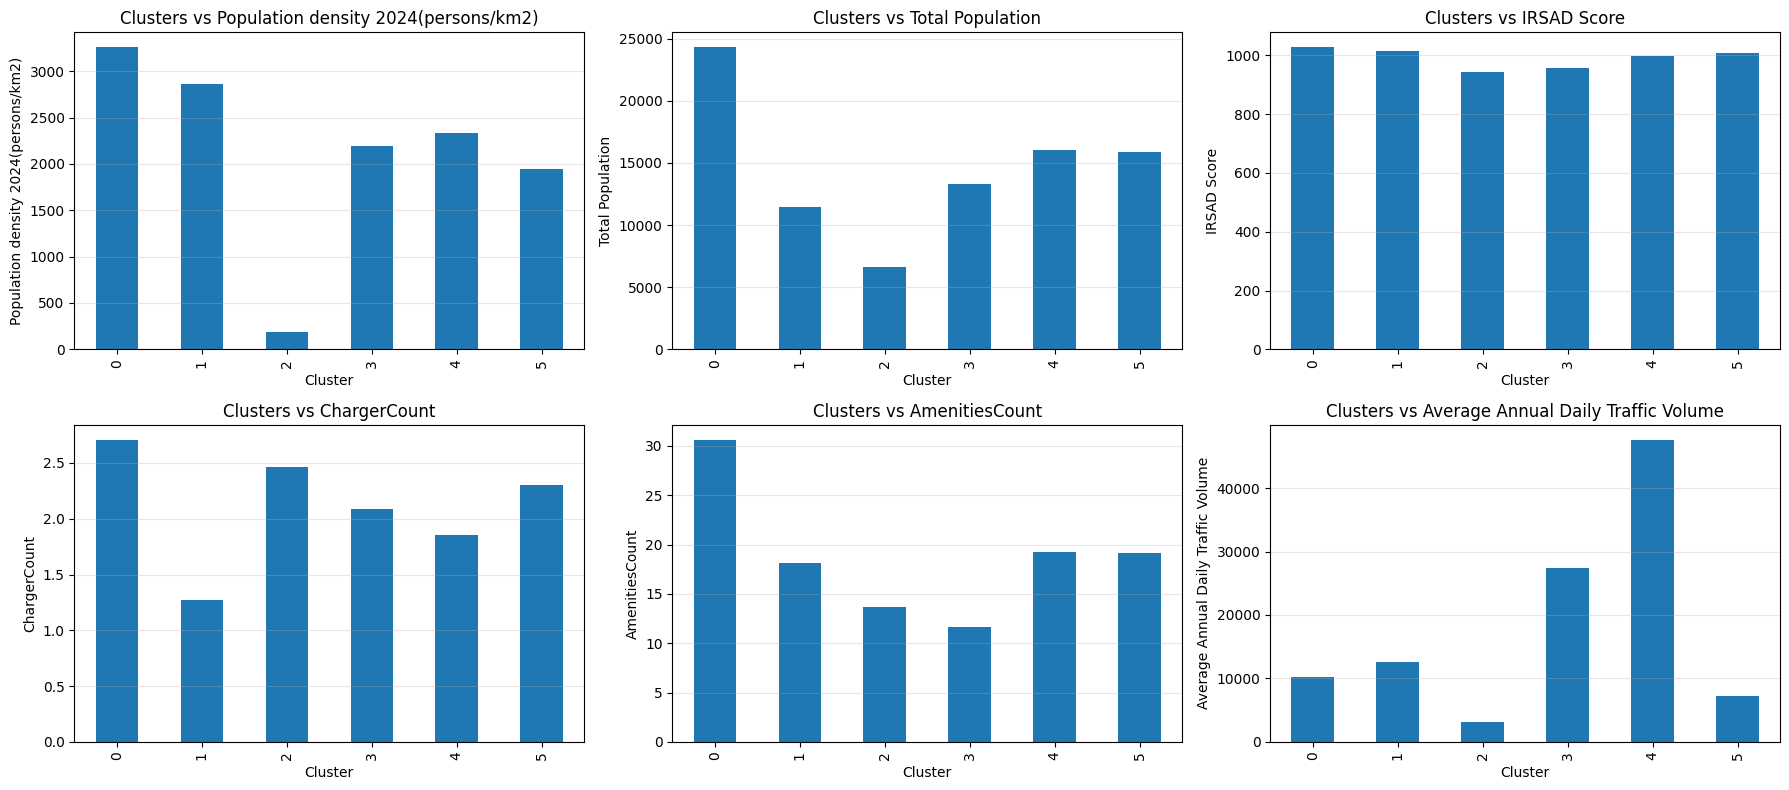

In [400]:
 import matplotlib.pyplot as plt

features = [
    'Population density 2024(persons/km2)',
    'Total Population',
    'IRSAD Score',
    'ChargerCount',
    'AmenitiesCount',
    'Average Annual Daily Traffic Volume'
]

n_features = len(features)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))  # 2 rows, 3 columns
axes = axes.flatten()  # Make it easier to iterate

for i, feat in enumerate(features):
    ax = axes[i]
    cluster_profile[feat].plot(kind='bar', ax=ax)
    ax.set_title(f'Clusters vs {feat}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feat)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [401]:
dataset_sa2.rename(columns={'geometry_x': 'geometry'}, inplace=True)

In [402]:
dataset_sa2.head()

,SA2_CODE21,SA2_NAME21,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume,geometry
0,201011001,Alfredton,381.9,20126.13,1011.0,3.0,13,9692.036076,POLYGON ((143.78282104711133 -37.5666578080732...
1,201011002,Ballarat,951.1,11793.64,1040.0,5.0,34,8222.227273,POLYGON ((143.81896375194268 -37.5558184903035...
2,201011005,Buninyong,951.1,49076.76,1040.0,3.0,11,4408.875000,POLYGON ((143.8417079819547 -37.61596158212406...
3,201011006,Delacombe,417.8,14288.76,947.0,0.0,8,4324.000000,POLYGON ((143.7505006002539 -37.59119089617515...
4,201011007,Smythes Creek,40.8,4271.76,1005.0,0.0,1,9692.036076,POLYGON ((143.7329551500814 -37.62333175526272...


In [403]:
print(type(dataset_sa2))

<class 'pandas.core.frame.DataFrame'>


In [404]:
from shapely import wkt
# Step 2: Convert the WKT geometry column to shapely geometries
dataset_sa2['geometry'] = dataset_sa2['geometry'].apply(wkt.loads)

In [405]:
# Step 3: Convert to GeoDataFrame, specify CRS if known (e.g. EPSG:4326)
dataset_sa2 = gpd.GeoDataFrame(dataset_sa2, geometry='geometry', crs='EPSG:4326')

In [406]:
dataset_sa2.shape

(522, 9)

In [407]:
# Add cluster labels to your SA2 dataset
dataset_sa2['Cluster'] = y_kmeans


In [408]:
cluster_labels = {
    0: "High Demand, Low Supply",
    1: "Urban Hotspots (Dense, Moderate Supply)",
    2: "Very Low Demand / Rural Transit",
    3: "High‑Traffic Corridors (Undersupplied)",
    4: "Traffic Hotspots",
    5: "Well Supplied"
}
dataset_sa2["Cluster_Label"] = dataset_sa2["Cluster"].map(cluster_labels)


In [409]:
dataset_sa2.head()

,SA2_CODE21,SA2_NAME21,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume,geometry,Cluster,Cluster_Label
0,201011001,Alfredton,381.9,20126.13,1011.0,3.0,13,9692.036076,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",0,"High Demand, Low Supply"
1,201011002,Ballarat,951.1,11793.64,1040.0,5.0,34,8222.227273,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",5,Well Supplied
2,201011005,Buninyong,951.1,49076.76,1040.0,3.0,11,4408.875000,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6...",0,"High Demand, Low Supply"
3,201011006,Delacombe,417.8,14288.76,947.0,0.0,8,4324.000000,"POLYGON ((143.7505 -37.59119, 143.75044 -37.59...",5,Well Supplied
4,201011007,Smythes Creek,40.8,4271.76,1005.0,0.0,1,9692.036076,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6...",2,Very Low Demand / Rural Transit


In [410]:
dataset_sa2['Cluster_Label'].value_counts()

,count
Cluster_Label,
Well Supplied,149
Very Low Demand / Rural Transit,139
"Urban Hotspots (Dense, Moderate Supply)",116
"High Demand, Low Supply",75
High‑Traffic Corridors (Undersupplied),36
Traffic Hotspots,7


In [411]:
import folium
import branca.colormap as cm

# Reproject GeoDataFrame to WGS84 for Folium
dataset_sa2_web = dataset_sa2.to_crs("EPSG:4326")

# Create a base map centered on the mean of the SA2 areas
center_lat = dataset_sa2_web.geometry.representative_point().y.mean()
center_lon = dataset_sa2_web.geometry.representative_point().x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=7, tiles='cartodbpositron')

# Define a color map for the clusters
# You can use a specific color for each cluster or a sequential colormap based on a cluster property
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628'] # Example using Set1 from ColorBrewer

# Add SA2 polygons to the map, colored by cluster
folium.GeoJson(
    dataset_sa2_web,
    style_function=lambda feature: {
        'fillColor': colors[feature['properties']['Cluster']],
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['SA2_NAME21', 'Cluster_Label', 'Total Population', 'ChargerCount', 'Average Annual Daily Traffic Volume'],
        aliases=['SA2 Area:', 'Cluster Label:', 'Population:', 'Chargers:', 'Avg Daily Traffic:'],
        localize=True
    )
).add_to(m)

# Add a legend (manual for simplicity, more complex legend available in Folium docs)
legend_html = """
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 300px; height: 250px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; padding:10px;">
<b>Cluster Labels</b><br>
"""
for cluster_id, label in cluster_labels.items():
    legend_html += f'{cluster_id} - {label} <i style="color:{colors[cluster_id]}; font-size: 18px;">&#9632;</i><br>'

legend_html += "</div>"

m.get_root().html.add_child(folium.Element(legend_html))
m.save("cluster_map_new.html")


# Display the map
#m

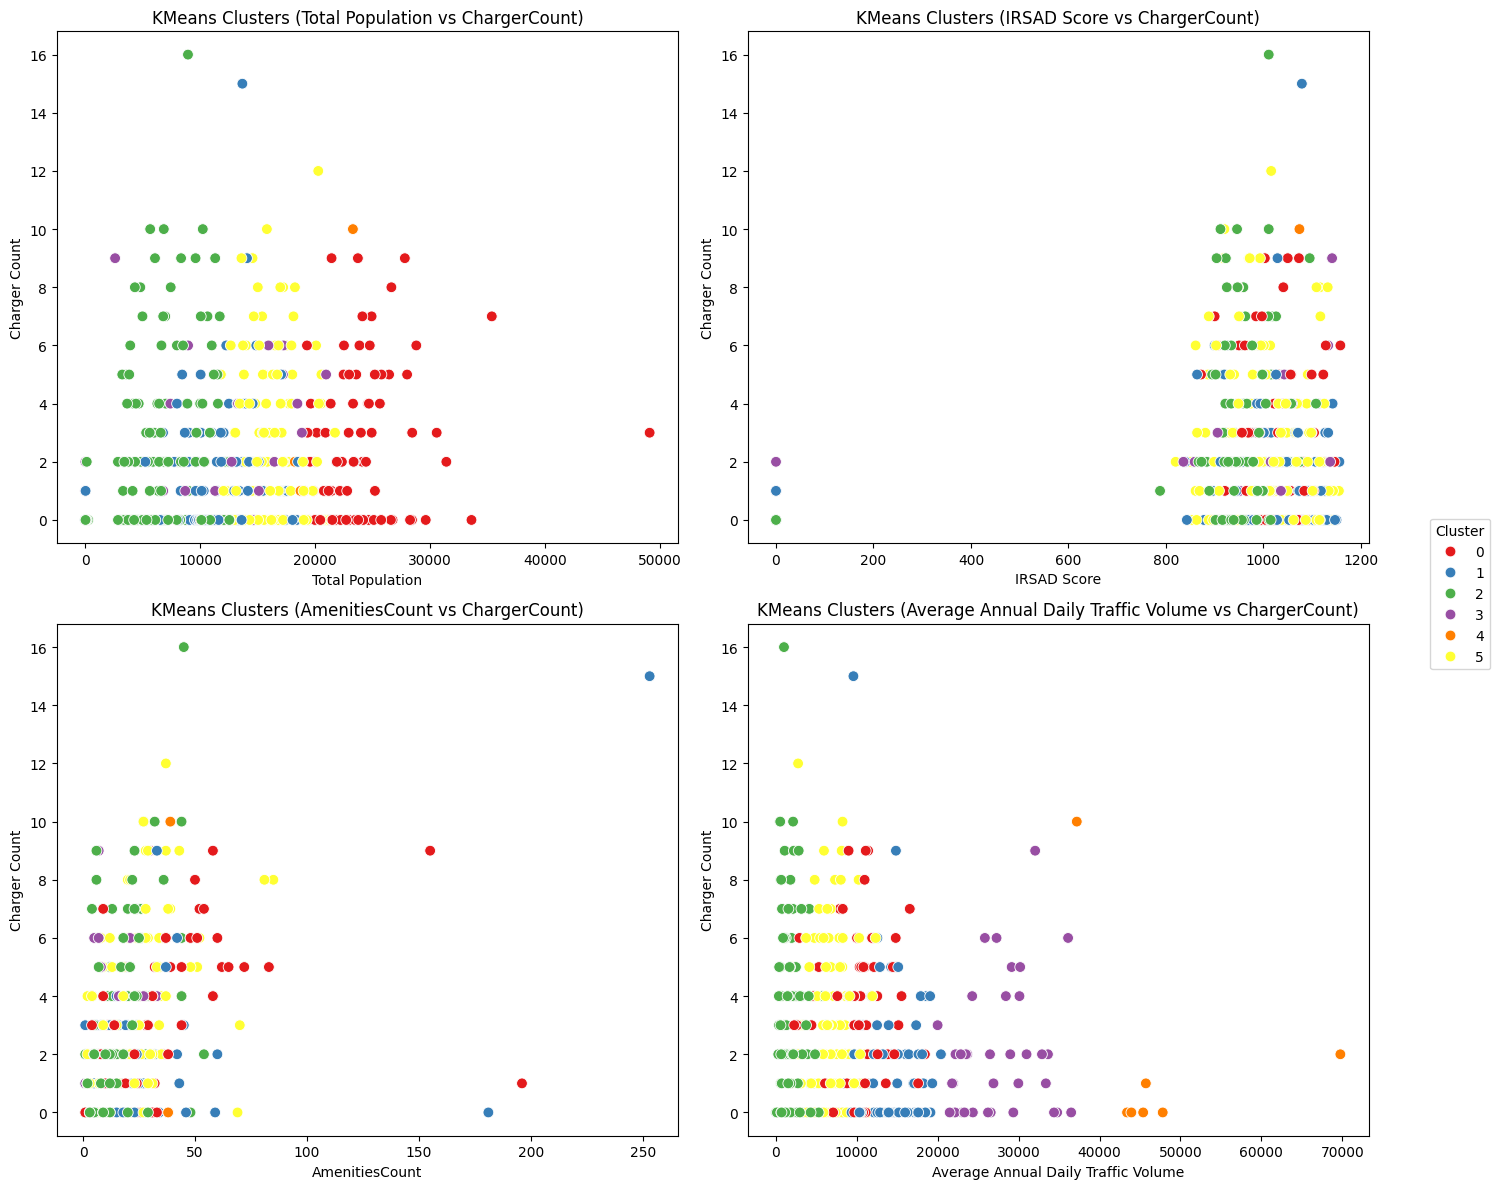

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature list (excluding SA2 name, since it's categorical)
features = [
    'Total Population',
    'IRSAD Score',
    'AmenitiesCount',
    'Average Annual Daily Traffic Volume'
]

n_features = len(features)
ncols = 2
nrows = (n_features + 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 12))
axes = axes.flatten()

for i, feat in enumerate(features):
    sns.scatterplot(
        x=dataset_sa2[feat],
        y=dataset_sa2['ChargerCount'],
        hue=dataset_sa2['Cluster'],
        palette="Set1",
        s=60,
        ax=axes[i]
    )
    axes[i].set_title(f"KMeans Clusters ({feat} vs ChargerCount)")
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Charger Count")
    axes[i].legend([],[], frameon=False)  # remove duplicate legends

# Add one common legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Cluster", bbox_to_anchor=(1.02, 0.5), loc="center left")

plt.tight_layout()
plt.show()



# Visualization of new charging stations

In [413]:
traffic_flow_sa2 = gpd.read_file("/content/drive/MyDrive/data/Traffic_flow_in_victoria_new.geojson")
chargers_gdf = gpd.read_file("/content/drive/MyDrive/data/chargers_stations_new.geojson")
amenities_gdf = gpd.read_file("/content/drive/MyDrive/data/filtered_amenities_gdf.geojson")

In [414]:
# ---- 0) Imports ----
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.ops import unary_union
from sklearn.preprocessing import MinMaxScaler

# ---- 1) Config / CRS ----
# Use a metric CRS for Victoria for distances/buffers (meters)
CRS_METRIC = 3111   # VicGrid; change if your data uses another metric CRS
CRS_WEB    = 4326   # WGS84 for Folium

# Column names (change here if your columns differ)
COL_SA2_CODE = "SA2_CODE21"
COL_SA2_NAME = "SA2_NAME21"
COL_LABEL    = "Cluster_Label"  # where "High Demand, Low Supply (Priority)" lives
COL_AADT     = "Average Annual Daily Traffic Volume"                  # traffic on roads_gdf lines
COL_AMEN_CLS = "fclass"                # amenity type/class in amenities_gdf

# ---- 2) Filter "High Demand, Low Supply (Priority)" SA2s ----
red_sa2 = dataset_sa2[dataset_sa2[COL_LABEL].str.contains("High Demand, Low Supply", case=False, na=False)].copy()
if red_sa2.empty:
    raise ValueError("No SA2s labeled as High Demand/Low Supply found. Check COL_LABEL or labels text.")

# ---- 3) Reproject everything to a metric CRS ----
red_sa2   = red_sa2.to_crs(CRS_METRIC)
roads     = traffic_flow_sa2.to_crs(CRS_METRIC)
amen      = amenities_gdf.to_crs(CRS_METRIC)
chargers  = chargers_gdf.to_crs(CRS_METRIC)

# ---- 4) Build candidate zones: inside red SA2s and within 500 m of major roads ----
roads_buffer = roads.buffer(500)  # meters
roads_buffer = gpd.GeoDataFrame(geometry=roads_buffer, crs=CRS_METRIC)

# Intersect with High-Demand SA2s
cands_poly = gpd.overlay(red_sa2, roads_buffer, how="intersection")

# Keep zones that touch at least one amenity
amen_union = amen.unary_union
cands_poly = cands_poly[cands_poly.intersects(amen_union)]

# Clean small slivers and explode multipart
if not cands_poly.empty:
    cands_poly = cands_poly.explode(index_parts=False, ignore_index=True)
    cands_poly["area_m2"] = cands_poly.area
    cands_poly = cands_poly[cands_poly["area_m2"] >= 20000].copy()  # drop tiny polygons < 0.02 km²

if cands_poly.empty:
    raise ValueError("No candidate polygons after filtering. Loosen buffers/filters or check inputs.")

# ---- 5) Convert candidate polygons to representative points (always inside polygon) ----
cands_poly["geometry_point"] = cands_poly.representative_point()
cands_pts = gpd.GeoDataFrame(
    cands_poly.drop(columns="geometry").rename(columns={"geometry_point":"geometry"}),
    geometry="geometry", crs=CRS_METRIC
).reset_index(drop=True)

# Ensure SA2 identifiers exist on points
for col in [COL_SA2_CODE, COL_SA2_NAME]:
    if col not in cands_pts.columns and col in red_sa2.columns:
        cands_pts[col] = gpd.sjoin(cands_pts, red_sa2[[col, "geometry"]], how="left", predicate="within")[col].values

# ---- 6) Feature engineering around each candidate point ----
# 6a) Traffic within 200 m (sum of AADT of intersecting road segments)
buf200 = cands_pts.buffer(200)
buf200_gdf = gpd.GeoDataFrame(cands_pts[[COL_SA2_CODE, COL_SA2_NAME]].copy(), geometry=buf200, crs=CRS_METRIC)

j_r = gpd.sjoin(buf200_gdf, roads[[COL_AADT, "geometry"]], how="left", predicate="intersects")
traffic_sum = j_r.groupby(j_r.index)[COL_AADT].sum().fillna(0.0)
cands_pts["Traffic_200m"] = 0.0
cands_pts.loc[traffic_sum.index, "Traffic_200m"] = traffic_sum.values

# 6b) Amenity density within 300 m (weighted count; adjust weights as needed)
buf300 = cands_pts.buffer(300)
buf300_gdf = gpd.GeoDataFrame(cands_pts[[COL_SA2_CODE, COL_SA2_NAME]].copy(), geometry=buf300, crs=CRS_METRIC)

j_a = gpd.sjoin(buf300_gdf, amen[[COL_AMEN_CLS, "geometry"]], how="left", predicate="intersects")

weights = {  # tune weights to your priorities
    "supermarket": 2.0, "mall": 2.0, "parking": 1.8,
    "hospital": 1.8, "university": 1.6, "school": 1.4,
    "cinema": 1.4, "restaurant": 1.2, "cafe": 1.1
}
if COL_AMEN_CLS in j_a.columns:
    j_a["amen_w"] = j_a[COL_AMEN_CLS].map(weights).fillna(1.0)
else:
    j_a["amen_w"] = 1.0

amen_score = j_a.groupby(j_a.index)["amen_w"].sum().fillna(0.0)
cands_pts["AmenityScore_300m"] = 0.0
cands_pts.loc[amen_score.index, "AmenityScore_300m"] = amen_score.values

# 6c) Distance to the nearest existing charger (meters) — bigger = larger supply gap
nearest = gpd.sjoin_nearest(
    cands_pts[["geometry"]], chargers[["geometry"]],
    how="left", distance_col="dist_to_ch_m"
)
cands_pts["dist_to_ch_m"] = nearest["dist_to_ch_m"].fillna(1e6)

# ---- 7) Build a SiteScore (normalize → weighted sum) ----
scaler = MinMaxScaler()
to_norm = cands_pts[["Traffic_200m", "AmenityScore_300m", "dist_to_ch_m"]].values
cands_pts[["Traffic_200m_n", "AmenityScore_300m_n", "dist_to_ch_m_n"]] = scaler.fit_transform(to_norm)

# weights: emphasize traffic & distance gap, keep amenities important too
cands_pts["SiteScore"] = (
    0.40 * cands_pts["Traffic_200m_n"] +
    0.30 * cands_pts["AmenityScore_300m_n"] +
    0.30 * cands_pts["dist_to_ch_m_n"]
)

# ---- 8) Pick the TOP-1 site per SA2 (change to head(2/3) if you want more) ----
cands_pts["rank_in_sa2"] = cands_pts.groupby(COL_SA2_CODE)["SiteScore"].rank(ascending=False, method="first")
top1 = cands_pts[cands_pts["rank_in_sa2"] == 1].copy().sort_values("SiteScore", ascending=False)

# ---- 9) Build an interactive Folium map ----
import folium
from folium.plugins import MarkerCluster

red_sa2_web = red_sa2.to_crs(CRS_WEB)
top1_web    = top1.to_crs(CRS_WEB)

center_lat = red_sa2_web.geometry.representative_point().y.mean()
center_lon = red_sa2_web.geometry.representative_point().x.mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=7, tiles="cartodbpositron")

# Red SA2 polygons
folium.GeoJson(
    red_sa2_web[[COL_SA2_CODE, COL_SA2_NAME, COL_LABEL, "geometry"]],
    name="High-Demand Low-Supply SA2s",
    style_function=lambda f: {"fillColor":"#e41a1c","color":"#333","weight":1,"fillOpacity":0.25},
    tooltip=folium.GeoJsonTooltip(
        fields=[COL_SA2_CODE, COL_SA2_NAME, COL_LABEL],
        aliases=["SA2 Code", "SA2 Name", "Label"], sticky=True
    )
).add_to(m)

# Candidate markers (top-1 per SA2)
mc = MarkerCluster(name="Top site per SA2").add_to(m)
for _, r in top1_web.iterrows():
    folium.CircleMarker(
        location=[r.geometry.y, r.geometry.x],
        radius=6, color="#1f78b4", fill=True, fill_opacity=0.95,
        popup=folium.Popup(
            f"<b>{COL_SA2_NAME}:</b> {r.get(COL_SA2_NAME,'')}<br>"
            f"<b>SiteScore:</b> {r['SiteScore']:.3f}<br>"
            f"Traffic (200m): {int(r['Traffic_200m'])}<br>"
            f"Amenity score (300m): {r['AmenityScore_300m']:.1f}<br>"
            f"Nearest charger: {int(r['dist_to_ch_m'])} m",
            max_width=320
        )
    ).add_to(mc)

folium.LayerControl(collapsed=False).add_to(m)
m.save("priority_charger_sites.html")

# ---- 10) Export CSV with lat/lon for top sites ----
out = top1.to_crs(CRS_WEB).copy()
out["lat"] = out.geometry.y
out["lon"] = out.geometry.x
cols = [COL_SA2_CODE, COL_SA2_NAME, "SiteScore", "Traffic_200m", "AmenityScore_300m", "dist_to_ch_m", "lat", "lon"]
out[cols].to_csv("priority_charger_sites_top1.csv", index=False)

print(f"Saved map: priority_charger_sites.html")
print(f"Saved table: priority_charger_sites_top1.csv")
#m


/tmp/ipython-input-2021991448.py:39: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  amen_union = amen.unary_union


Saved map: priority_charger_sites.html
Saved table: priority_charger_sites_top1.csv


In [415]:
# ---- 9) Build an interactive Folium map (point-wise priority sites) ----
import folium
import numpy as np
import branca.colormap as cm
from folium.plugins import HeatMap

red_sa2_web = red_sa2.to_crs(CRS_WEB)
top1_web    = top1.to_crs(CRS_WEB)

center_lat = red_sa2_web.geometry.representative_point().y.mean()
center_lon = red_sa2_web.geometry.representative_point().x.mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=7, tiles="cartodbpositron")

# 9a) Red SA2 polygons (priority areas)
folium.GeoJson(
    red_sa2_web[[COL_SA2_CODE, COL_SA2_NAME, COL_LABEL, "geometry"]],
    name="High-Demand Low-Supply SA2s",
    style_function=lambda f: {"fillColor":"#e41a1c","color":"#333","weight":1,"fillOpacity":0.25},
    tooltip=folium.GeoJsonTooltip(
        fields=[COL_SA2_CODE, COL_SA2_NAME, COL_LABEL],
        aliases=["SA2 Code","SA2 Name","Label"], sticky=True
    )
).add_to(m)

# 9b) Colour scale by SiteScore (quantile stretch)
qmin, qmax = top1_web["SiteScore"].quantile([0.05, 0.95])
colormap = cm.LinearColormap(
    colors=["#fee5d9","#fcae91","#fb6a4a","#de2d26","#a50f15"], vmin=qmin, vmax=qmax
).to_step(5)
colormap.caption = "SiteScore (higher = stronger candidate)"
m.add_child(colormap)

# 9c) Point-wise markers (NO clustering)
pts_fg = folium.FeatureGroup(name="Priority sites (points)").add_to(m)
for _, r in top1_web.iterrows():
    score = float(np.clip(r["SiteScore"], qmin, qmax))
    folium.CircleMarker(
        location=[r.geometry.y, r.geometry.x],
        radius=5 + 6*(score - qmin)/(qmax - qmin + 1e-9),  # size by score
        color="#333",
        weight=0.6,
        fill=True,
        fill_color=colormap(score),
        fill_opacity=0.95,
        tooltip=f"{r.get(COL_SA2_NAME,'')} | SiteScore: {r['SiteScore']:.3f}",
        popup=folium.Popup(
            f"<b>{COL_SA2_NAME}:</b> {r.get(COL_SA2_NAME,'')}<br>"
            f"<b>SiteScore:</b> {r['SiteScore']:.3f}<br>"
            f"Traffic (200m): {int(r['Traffic_200m'])}<br>"
            f"Amenity score (300m): {r['AmenityScore_300m']:.1f}<br>"
            f"Nearest charger: {int(r['dist_to_ch_m'])} m",
            max_width=320
        )
    ).add_to(pts_fg)

# 9d) Optional: Heatmap of scores (toggleable)
heat_fg = folium.FeatureGroup(name="SiteScore Heatmap", show=False).add_to(m)
HeatMap(
    data=[[row.geometry.y, row.geometry.x, row.SiteScore] for _, row in top1_web.iterrows()],
    radius=18, blur=22, min_opacity=0.25, max_val=top1_web["SiteScore"].max()
).add_to(heat_fg)

folium.LayerControl(collapsed=False).add_to(m)
m.save("priority_charger_sites_pointwise.html")
print("Saved map: priority_charger_sites_pointwise.html")
#m


/tmp/ipython-input-938732556.py:59: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


Saved map: priority_charger_sites_pointwise.html


In [416]:
data = pd.read_csv("/content/priority_charger_sites_top1.csv")

In [417]:
data['geometry'] = data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

In [418]:
gdf_new_station = gpd.GeoDataFrame(data, geometry='geometry', crs='EPSG:4326')

In [419]:
gdf_new_station.to_file("new_charger_stations.geojson", driver='GeoJSON')